In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#instance-based+schema-based AOA_6 (нет тегов, нет фич_2)
with open('accuracy_test_5.p', 'rb') as file:
    all_acc_1 = pickle.load(file)
#с1 AOA_6 
with open('accuracy_c1_test_4.p', 'rb') as file:
    acc_c = pickle.load(file)
#с тэгами AOA_6 (фич_2 нет)
with open('accuracy_f_test_4.p', 'rb') as file:
    all_acc_f = pickle.load(file)
#без описательной статистики и без тэгов+ тип данных и фичи_2
with open('accuracy_f_2_test_8.p', 'rb') as file:
     accuracy_f_2_test_8 = pickle.load(file)
#фичи_2 + тэги + тип данных (без описательной статистики)
with open('accuracy_f_2_test_7.p', 'rb') as file:
    accuracy_f_2_test_7 = pickle.load(file)
#фичи_2 + тэги (без типа данных, без описательной статистики)
with open('accuracy_f_2_test_6.p', 'rb') as file:
    accuracy_f_2_test_6 = pickle.load(file)
#со всем
with open('accuracy_f_2_test_4.p', 'rb') as file:
    accuracy_f_2_test_4 = pickle.load(file)

In [4]:
#только описательная статистика
with open('accuracy_1f.p', 'rb') as file:
    accuracy_1f = pickle.load(file)

In [5]:
#БЕЗ ВАЛИДАЦИИ
#Тэги опис стат тип
with open('accuracy_without_cv_tags.p', 'rb') as file:
    accuracy_without_cv_tags = pickle.load(file)
#все фичи
with open('accuracy_without_cv_all_f.p', 'rb') as file:
    accuracy_without_cv_all_f = pickle.load(file)

In [9]:
#Федеративное обучение
#только описательная статистика
with open('accuracy_fed_test_1f_2.p', 'rb') as file:
    accuracy_fed_test_1f_2 = pickle.load(file)
#instance-based+schema-based AOA_6
with open('accuracy_fed_test_3.p', 'rb') as file:
    fed_acc = pickle.load(file)
#с1 AOA_6
with open('accuracy_fed_c1_test_3.p', 'rb') as file:
    fed_acc_c = pickle.load(file)
#с тэгами AOA_6
with open('accuracy_fed_f_test_3.p', 'rb') as file:
    fed_acc_f = pickle.load(file)

In [10]:
def get_acc(acc_,k_fold=5, model_name='AOA_6'):
    mean_acc = []
    for acc in acc_:
        mean_acc.append(np.mean(acc[model_name]))
    max_acc = []
    mean_acc_fold = []
    for j in range(0,len(mean_acc)-k_fold+1, k_fold):
        mean_acc_fold.append(np.mean(mean_acc[j:j+k_fold]))
        max_acc.append(max(mean_acc[j:j+k_fold]))
    return max_acc, mean_acc_fold
def get_acc_fed(fed_acc,model_name='AOA_6',epoch=10):
    mean_acc = []
    i = 0
    for acc in fed_acc:
        mean_acc.append(np.mean(acc[f'{model_name}']))
        i+=1
    max_acc = []
    for j in range(0,len(mean_acc)-epoch+1, epoch):
        max_acc.append(max(mean_acc[j:j+epoch]))
    return max_acc

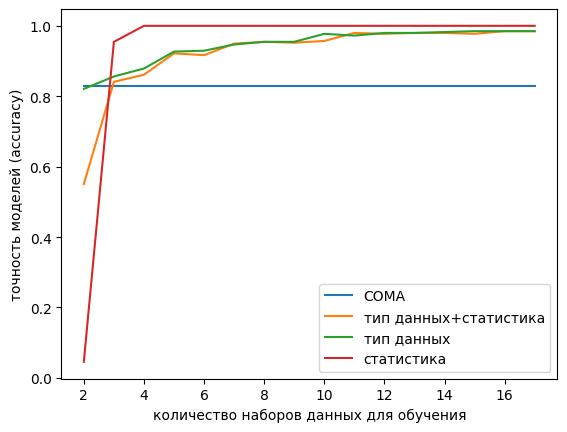

In [22]:
y1 = [np.mean(i['COMA']) for i in all_acc_1]
y2 = get_acc(all_acc_1)[0]
y3 = get_acc(acc_c)[0]
y4 = get_acc(accuracy_1f, model_name='AOA_7')[0]

x = list(range(2,18))
n=16
plt.plot(x, y1[:n])
plt.plot(x, y2[:n])
plt.plot(x, y3[:n])
plt.plot(x, y4[:n])
plt.legend(['COMA','тип данных+статистика', 'тип данных', 'статистика'])
ax = plt.subplot()
ax.set_xlabel('количество наборов данных для обучения')
ax.set_ylabel('точность моделей (accuracy)')
plt.show()

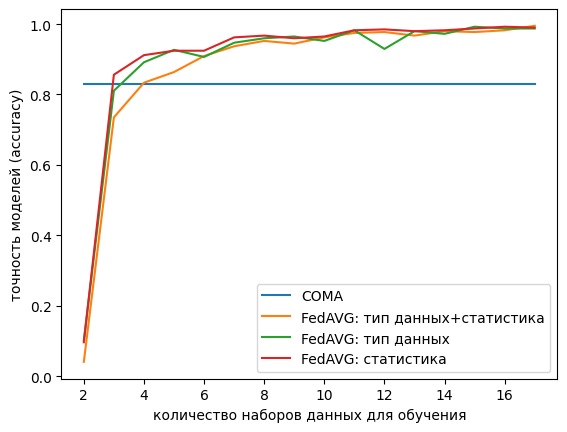

In [23]:
y5 = [np.mean(i['COMA']) for i in all_acc_1]
y6 = get_acc_fed(fed_acc,"AOA_6")
y7 = get_acc_fed(fed_acc_c,"AOA_6")
y8 = get_acc_fed(accuracy_fed_test_1f_2,"AOA_7",20)


x = list(range(2,18))
n=16
plt.plot(x, y5[:n])
plt.plot(x, y6[:n])
plt.plot(x, y7[:n])
plt.plot(x, y8[:n])

plt.legend(['COMA','FedAVG: тип данных+статистика', 'FedAVG: тип данных', 'FedAVG: статистика'])
ax = plt.subplot()
ax.set_xlabel('количество наборов данных для обучения')
ax.set_ylabel('точность моделей (accuracy)')
plt.show()

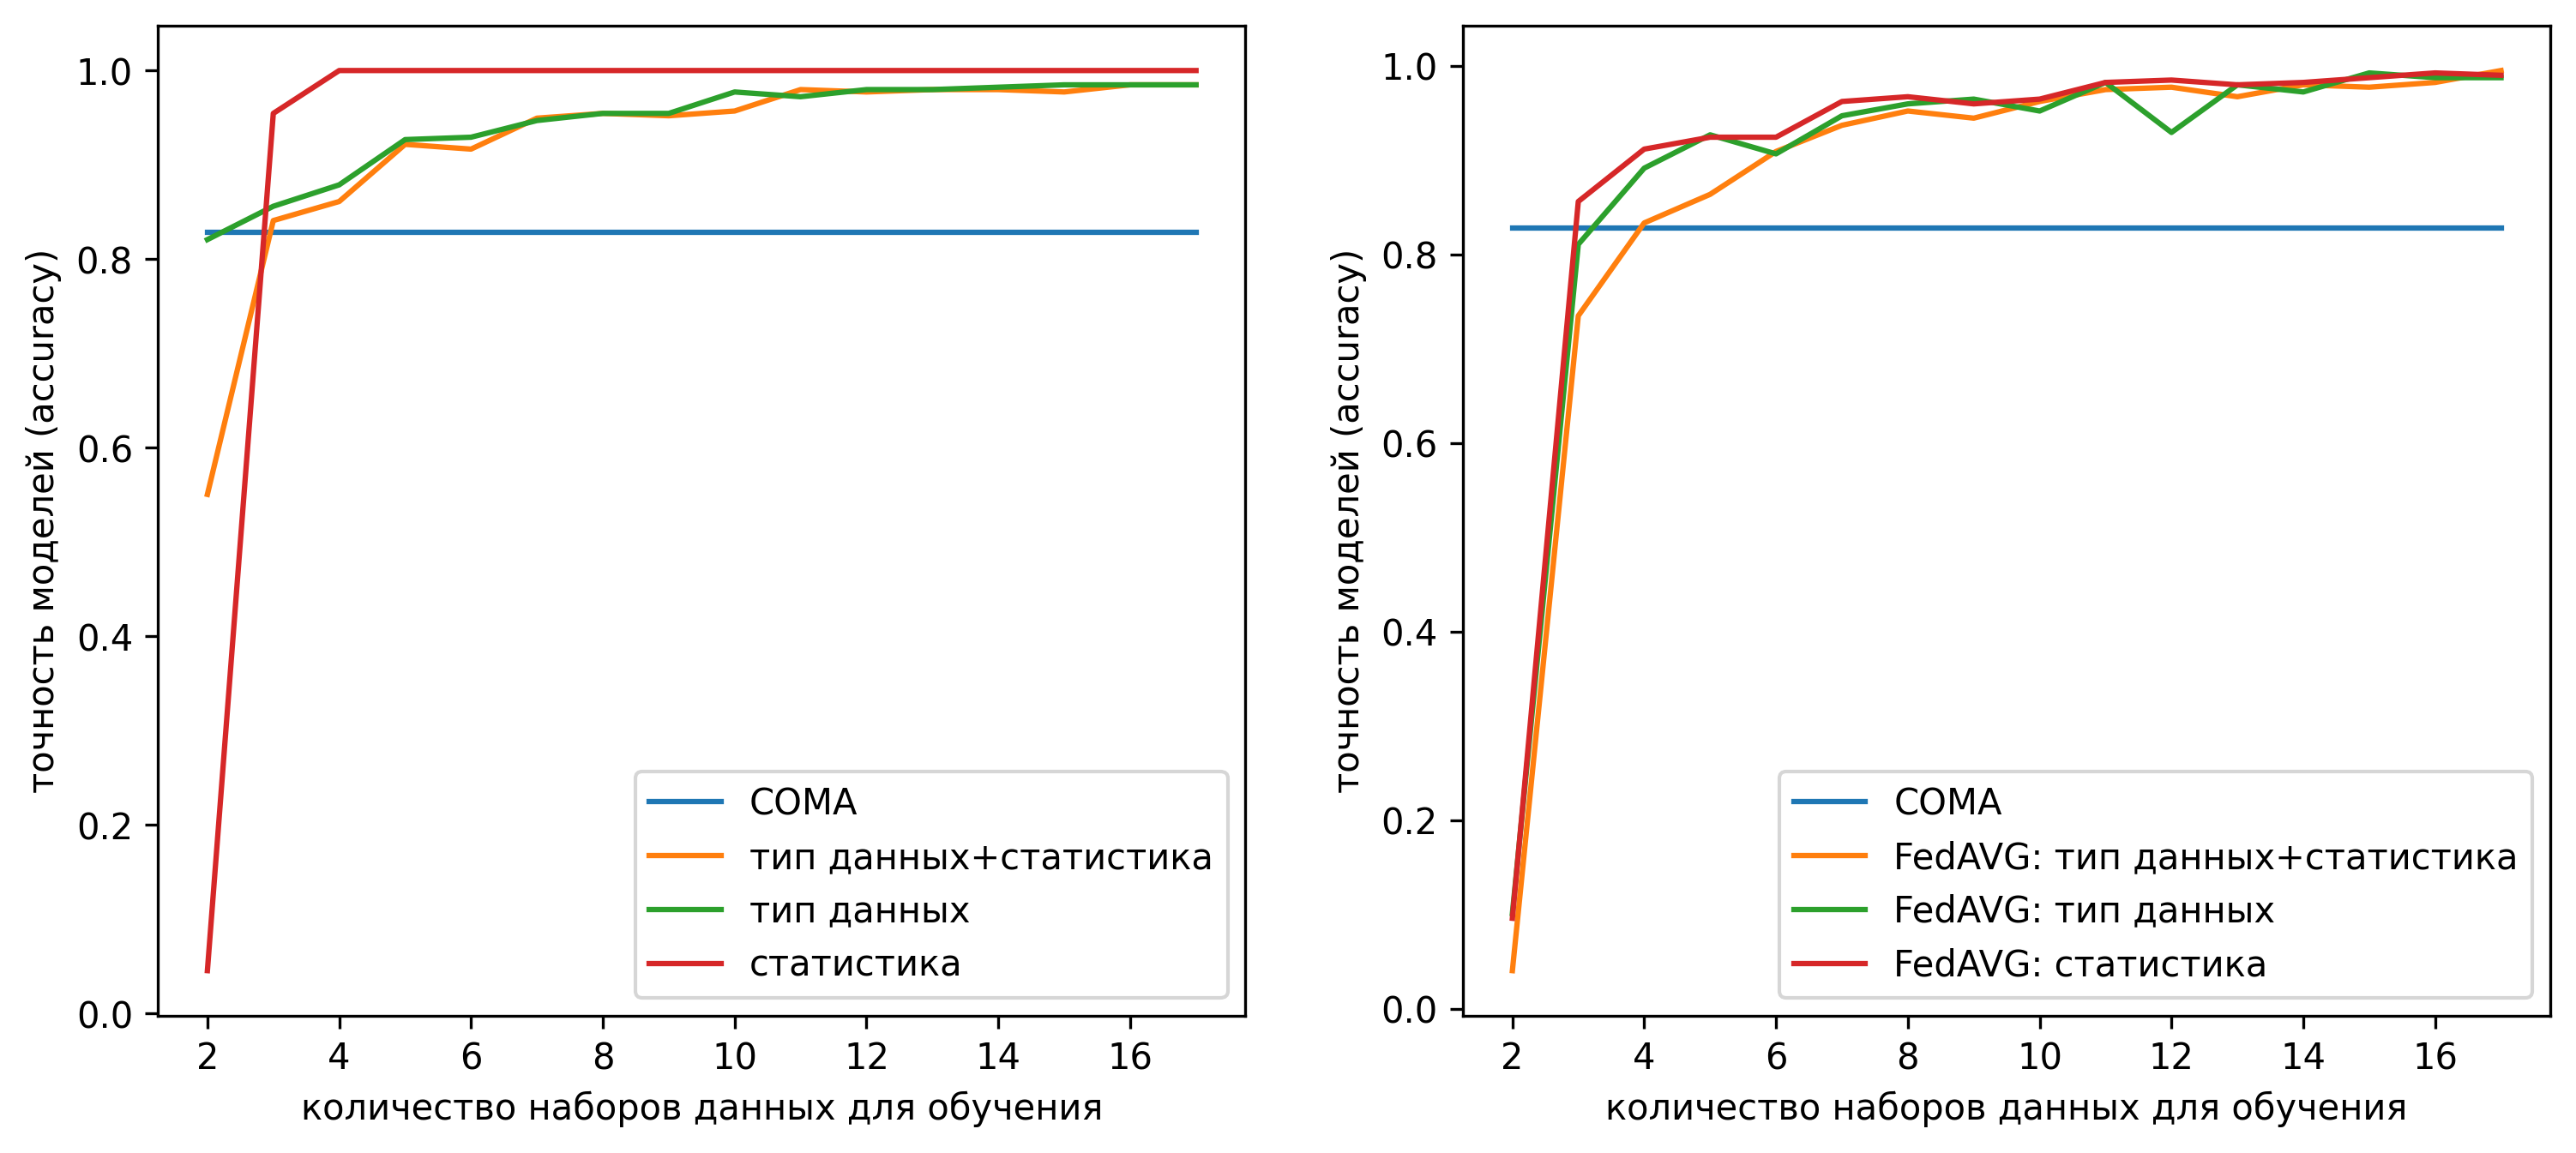

In [32]:
figure, axis = plt.subplots(1, 2, figsize=(12,5),dpi=300)

axis[0].plot(x, y1[:n])
axis[0].plot(x, y2[:n])
axis[0].plot(x, y3[:n])
axis[0].plot(x, y4[:n])
axis[0].legend(['COMA','тип данных+статистика', 'тип данных', 'статистика'])
axis[0].set_xlabel('количество наборов данных для обучения')
axis[0].set_ylabel('точность моделей (accuracy)')

axis[1].plot(x, y5[:n])
axis[1].plot(x, y6[:n])
axis[1].plot(x, y7[:n])
axis[1].plot(x, y8[:n])
axis[1].legend(['COMA','FedAVG: тип данных+статистика', 'FedAVG: тип данных', 'FedAVG: статистика'])
axis[1].set_xlabel('количество наборов данных для обучения')
axis[1].set_ylabel('точность моделей (accuracy)')

plt.show()

In [36]:
y3

[0.8207070707070707,
 0.856060606060606,
 0.8787878787878788,
 0.9267676767676767,
 0.9292929292929293,
 0.946969696969697,
 0.9545454545454545,
 0.9545454545454546,
 0.9772727272727272,
 0.9722222222222222,
 0.9797979797979798,
 0.9797979797979798,
 0.9823232323232324,
 0.9848484848484849,
 0.9848484848484849,
 0.9848484848484849]

In [35]:
y7

[0.101010101010101,
 0.8106060606060606,
 0.8914141414141414,
 0.9267676767676769,
 0.9065656565656567,
 0.946969696969697,
 0.9595959595959597,
 0.9646464646464646,
 0.952020202020202,
 0.9823232323232324,
 0.9292929292929293,
 0.9797979797979798,
 0.9722222222222222,
 0.9924242424242424,
 0.9873737373737375,
 0.9873737373737375]

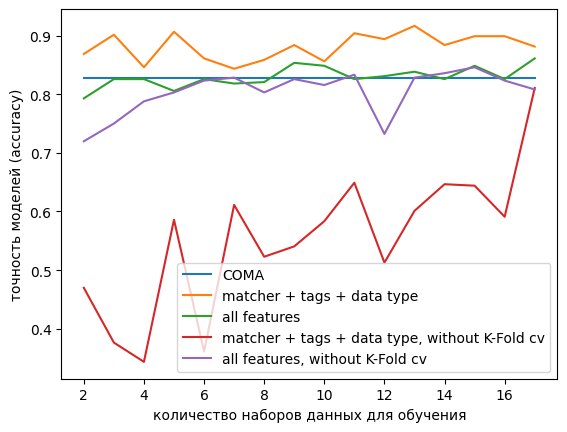

In [18]:
y1 = [np.mean(i['COMA']) for i in all_acc_1]
y2 = get_acc(accuracy_f_2_test_7, model_name='AOA_7')[0]
y3 = get_acc(accuracy_f_2_test_4)[0]
y4 = [np.mean(i['AOA_6']) for i in accuracy_without_cv_tags]
y5 = [np.mean(i['AOA_6']) for i in accuracy_without_cv_all_f]

x = list(range(2,18))
n=16

plt.plot(x, y1[:n])
plt.plot(x, y2[:n])
plt.plot(x, y3[:n])
plt.plot(x, y4[:n])
plt.plot(x, y5[:n])
plt.legend(['COMA', 'matcher + tags + data type', 'all features', 'matcher + tags + data type, without K-Fold cv', 
            'all features, without K-Fold cv'])
ax = plt.subplot()
ax.set_xlabel('количество наборов данных для обучения')
ax.set_ylabel('точность моделей (accuracy)')
plt.show()

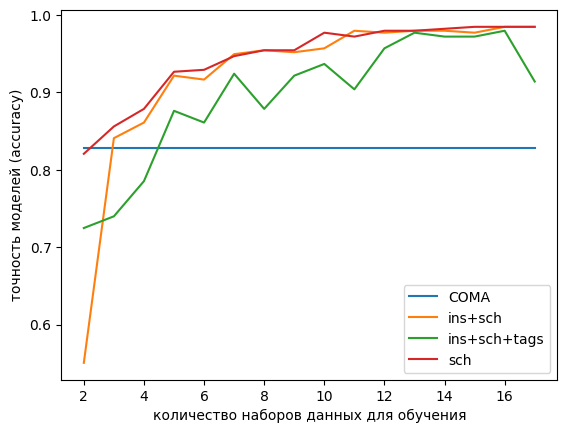

In [4]:
y1 = [np.mean(i['COMA']) for i in all_acc_1]
y2 = get_acc(all_acc_1)[0]
y3 = get_acc(all_acc_f)[0]
y4 = get_acc(acc_c)[0]

x = list(range(2,18))
n=16
plt.plot(x, y1[:n])
plt.plot(x, y2[:n])
plt.plot(x, y3[:n])
plt.plot(x, y4[:n])
plt.legend(['COMA','ins+sch', 'ins+sch+tags', 'sch'])
ax = plt.subplot()
ax.set_xlabel('количество наборов данных для обучения')
ax.set_ylabel('точность моделей (accuracy)')
plt.show()

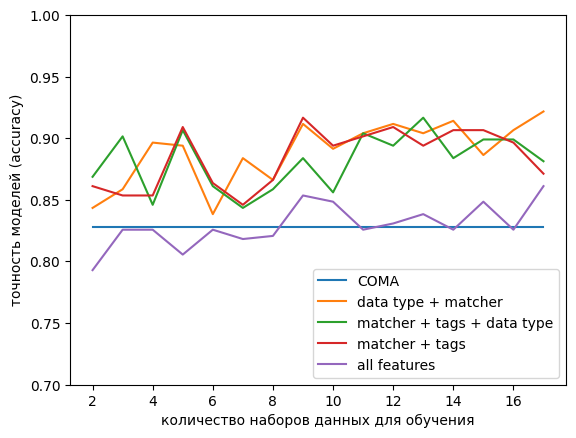

In [10]:
y1 = [np.mean(i['COMA']) for i in all_acc_1]
y2 = get_acc(accuracy_f_2_test_8, model_name='AOA_7')[0]
y3 = get_acc(accuracy_f_2_test_7, model_name='AOA_7')[0]
y4 = get_acc(accuracy_f_2_test_6, model_name='AOA_7')[0]
y5 = get_acc(accuracy_f_2_test_4, model_name='AOA_6')[0]

x = list(range(2,18))
n=16

plt.plot(x, y1[:n])
plt.plot(x, y2[:n])
plt.plot(x, y3[:n])
plt.plot(x, y4[:n])
plt.plot(x, y5[:n])
plt.legend(['COMA','data type + matcher', 'matcher + tags + data type', 'matcher + tags','all features'])
ax = plt.subplot()
ax.set_xlabel('количество наборов данных для обучения')
ax.set_ylabel('точность моделей (accuracy)')
ax.set_ylim([0.7, 1])
plt.show()

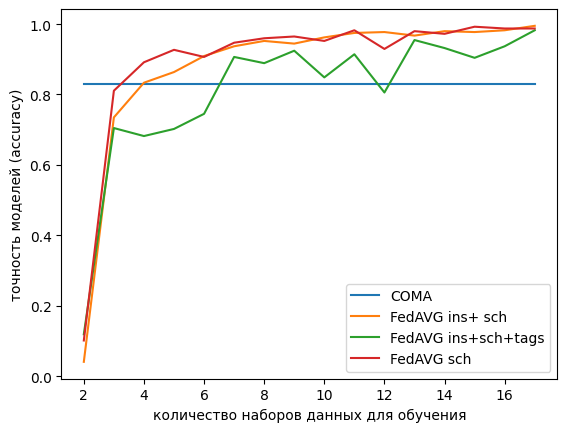

In [8]:
y1 = [np.mean(i['COMA']) for i in all_acc_1]
y2 = get_acc_fed(fed_acc,"AOA_6")
y3 = get_acc_fed(fed_acc_f,"AOA_6")
y4 = get_acc_fed(fed_acc_c,"AOA_6")

x = list(range(2,18))
n=16
plt.plot(x, y1[:n])
plt.plot(x, y2[:n])
plt.plot(x, y3[:n])
plt.plot(x, y4[:n])

plt.legend(['COMA','FedAVG ins+ sch',
            'FedAVG ins+sch+tags','FedAVG sch'])
ax = plt.subplot()
ax.set_xlabel('количество наборов данных для обучения')
ax.set_ylabel('точность моделей (accuracy)')
plt.show()

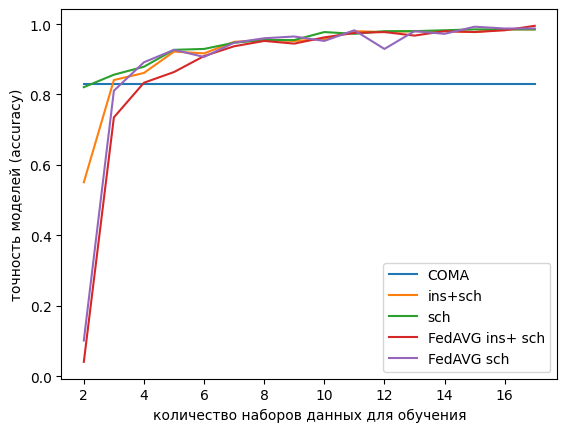

In [9]:


y1 = [np.mean(i['COMA']) for i in all_acc_1]
y2 = get_acc(all_acc_1)[0]
y3 = get_acc(acc_c)[0]

y4 = get_acc_fed(fed_acc,"AOA_6")
y5 = get_acc_fed(fed_acc_c,"AOA_6")

x = list(range(2,18))
n = 16
plt.plot(x, y1[:n])
plt.plot(x, y2[:n])
plt.plot(x, y3[:n])
plt.plot(x, y4[:n])
plt.plot(x, y5[:n])

plt.legend(['COMA','ins+sch', 'sch','FedAVG ins+ sch','FedAVG sch'])
ax = plt.subplot()
ax.set_xlabel('количество наборов данных для обучения')
ax.set_ylabel('точность моделей (accuracy)')
plt.show()

In [14]:
t = []
for i in range(n):
    t.append(y2[i]>y4[i])
sum(t)

11

In [15]:
t = []
for i in range(n):
    t.append(y3[i]>y5[i])
sum(t)

6